In [1]:
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../.env", override=True)

True

In [2]:
from langchain_openai import ChatOpenAI

def multiply(a: int, b: int) -> int:
    """
    Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

def add(a: int, b: int) -> int:
    """
    Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

def divide(a: int, b: int) -> float:
    """
    Divide a by b.

    Args:
        a: first int
        b: second int
    """
    return a / b

def subtract(a: int, b: int) -> int:
    """
    Subtract b from a.

    Args:
        a: first int
        b: second int
    """
    return a - b

def modulo(a: int, b: int) -> int:
    """
    Modulo of a by b.

    Args:
        a: first int
        b: second int
    """
    return a % b

tools = [add, multiply, divide, subtract, modulo]
llm = ChatOpenAI(model="gpt-4.1-mini")
llm_with_tools = llm.bind_tools(tools)

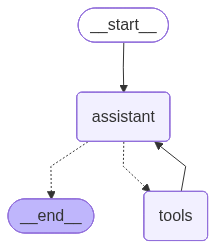

In [3]:
from IPython.display import Image, display
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import MessagesState
from langgraph.graph import START, END, StateGraph
from langgraph.prebuilt import tools_condition, ToolNode
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

sys_msg = SystemMessage(content="You are a helpful assistant tasked with performing arithmetic on a set of inputs.")

def assistant(state: MessagesState):
   return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

builder = StateGraph(MessagesState)

builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    tools_condition,
)
builder.add_edge("tools", "assistant")

memory = MemorySaver()
graph = builder.compile(checkpointer=MemorySaver())

display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [4]:
initial_input = {"messages": HumanMessage(content="Add 6 and 19")}
thread = {"configurable": {"thread_id": "1"}}

for event in graph.stream(initial_input, thread, stream_mode="values"):
    event['messages'][-1].pretty_print()

================================ Human Message =================================

Add 6 and 19
================================== Ai Message ==================================
Tool Calls:
  add (call_pjzIUcpS8pfUNZOLHIOA1jAa)
 Call ID: call_pjzIUcpS8pfUNZOLHIOA1jAa
  Args:
    a: 6
    b: 19
================================= Tool Message =================================
Name: add

25
================================== Ai Message ==================================

The sum of 6 and 19 is 25.


In [5]:
graph.get_state({'configurable': {'thread_id': '1'}})

StateSnapshot(values={'messages': [HumanMessage(content='Add 6 and 19', additional_kwargs={}, response_metadata={}, id='9404344a-acff-4a1b-9d4c-d011c616633a'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_pjzIUcpS8pfUNZOLHIOA1jAa', 'function': {'arguments': '{"a":6,"b":19}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 192, 'total_tokens': 209, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4c2851f862', 'id': 'chatcmpl-CVJ3WywuRew5UWRSUZO68gEvSbGYH', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--b5475165-16ef-4275-8c9e-2283dd643041-0', tool_calls=[{'name': 'add', 'args': {'a': 6, 'b': 19}, 'id': 'call_pjzIUcpS8pfUN

In [6]:
all_states = [s for s in graph.get_state_history(thread)]

In [7]:
len(all_states)

5

In [8]:
all_states[0]

StateSnapshot(values={'messages': [HumanMessage(content='Add 6 and 19', additional_kwargs={}, response_metadata={}, id='9404344a-acff-4a1b-9d4c-d011c616633a'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_pjzIUcpS8pfUNZOLHIOA1jAa', 'function': {'arguments': '{"a":6,"b":19}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 192, 'total_tokens': 209, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4c2851f862', 'id': 'chatcmpl-CVJ3WywuRew5UWRSUZO68gEvSbGYH', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--b5475165-16ef-4275-8c9e-2283dd643041-0', tool_calls=[{'name': 'add', 'args': {'a': 6, 'b': 19}, 'id': 'call_pjzIUcpS8pfUN

In [16]:
all_states[-3]

StateSnapshot(values={'messages': [HumanMessage(content='Add 6 and 19', additional_kwargs={}, response_metadata={}, id='9404344a-acff-4a1b-9d4c-d011c616633a'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_pjzIUcpS8pfUNZOLHIOA1jAa', 'function': {'arguments': '{"a":6,"b":19}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 192, 'total_tokens': 209, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4c2851f862', 'id': 'chatcmpl-CVJ3WywuRew5UWRSUZO68gEvSbGYH', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--b5475165-16ef-4275-8c9e-2283dd643041-0', tool_calls=[{'name': 'add', 'args': {'a': 6, 'b': 19}, 'id': 'call_pjzIUcpS8pfUN

In [17]:
to_replay = all_states[-3]

In [18]:
to_replay.values

{'messages': [HumanMessage(content='Add 6 and 19', additional_kwargs={}, response_metadata={}, id='9404344a-acff-4a1b-9d4c-d011c616633a'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_pjzIUcpS8pfUNZOLHIOA1jAa', 'function': {'arguments': '{"a":6,"b":19}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 192, 'total_tokens': 209, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4c2851f862', 'id': 'chatcmpl-CVJ3WywuRew5UWRSUZO68gEvSbGYH', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--b5475165-16ef-4275-8c9e-2283dd643041-0', tool_calls=[{'name': 'add', 'args': {'a': 6, 'b': 19}, 'id': 'call_pjzIUcpS8pfUNZOLHIOA1jAa', 'type

In [19]:
to_replay.next

('tools',)

In [20]:
to_replay.config

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0b3463-6ae4-60d7-8001-02e3a70f4528'}}

In [21]:
for event in graph.stream(None, to_replay.config, stream_mode="values"):
    event['messages'][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  add (call_pjzIUcpS8pfUNZOLHIOA1jAa)
 Call ID: call_pjzIUcpS8pfUNZOLHIOA1jAa
  Args:
    a: 6
    b: 19
================================= Tool Message =================================
Name: add

25
================================== Ai Message ==================================

6 added to 19 equals 25.


In [38]:
to_fork = all_states[-2]
to_fork.values["messages"]

[HumanMessage(content='Add 6 and 19', additional_kwargs={}, response_metadata={}, id='9404344a-acff-4a1b-9d4c-d011c616633a')]

In [39]:
to_fork.config

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0b3463-5a09-6c3c-8000-e7fa8da5f61c'}}

In [40]:
fork_config = graph.update_state(
    to_fork.config,
    {"messages": [HumanMessage(content='Add 8 and 19', 
                               id=to_fork.values["messages"][0].id)]},
)

In [41]:
fork_config

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0b3481-8abe-6435-8001-f625d92fa972'}}

In [42]:
all_states = [state for state in graph.get_state_history(thread) ]
all_states[0].values["messages"]

[HumanMessage(content='Add 8 and 19', additional_kwargs={}, response_metadata={}, id='9404344a-acff-4a1b-9d4c-d011c616633a'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_pjzIUcpS8pfUNZOLHIOA1jAa', 'function': {'arguments': '{"a":6,"b":19}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 192, 'total_tokens': 209, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4c2851f862', 'id': 'chatcmpl-CVJ3WywuRew5UWRSUZO68gEvSbGYH', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--b5475165-16ef-4275-8c9e-2283dd643041-0', tool_calls=[{'name': 'add', 'args': {'a': 6, 'b': 19}, 'id': 'call_pjzIUcpS8pfUNZOLHIOA1jAa', 'type': 'tool_call'

In [43]:
len(all_states)

19

In [44]:
graph.get_state({'configurable': {'thread_id': '1'}})

StateSnapshot(values={'messages': [HumanMessage(content='Add 8 and 19', additional_kwargs={}, response_metadata={}, id='9404344a-acff-4a1b-9d4c-d011c616633a'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_pjzIUcpS8pfUNZOLHIOA1jAa', 'function': {'arguments': '{"a":6,"b":19}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 192, 'total_tokens': 209, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4c2851f862', 'id': 'chatcmpl-CVJ3WywuRew5UWRSUZO68gEvSbGYH', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--b5475165-16ef-4275-8c9e-2283dd643041-0', tool_calls=[{'name': 'add', 'args': {'a': 6, 'b': 19}, 'id': 'call_pjzIUcpS8pfUN

In [45]:
for event in graph.stream(None, fork_config, stream_mode="values"):
    event['messages'][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  add (call_pjzIUcpS8pfUNZOLHIOA1jAa)
 Call ID: call_pjzIUcpS8pfUNZOLHIOA1jAa
  Args:
    a: 6
    b: 19
================================= Tool Message =================================
Name: add

25
================================== Ai Message ==================================

The sum of 8 and 19 is 27.


In [46]:
graph.get_state({'configurable': {'thread_id': '1'}})

StateSnapshot(values={'messages': [HumanMessage(content='Add 8 and 19', additional_kwargs={}, response_metadata={}, id='9404344a-acff-4a1b-9d4c-d011c616633a'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_pjzIUcpS8pfUNZOLHIOA1jAa', 'function': {'arguments': '{"a":6,"b":19}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 192, 'total_tokens': 209, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4c2851f862', 'id': 'chatcmpl-CVJ3WywuRew5UWRSUZO68gEvSbGYH', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--b5475165-16ef-4275-8c9e-2283dd643041-0', tool_calls=[{'name': 'add', 'args': {'a': 6, 'b': 19}, 'id': 'call_pjzIUcpS8pfUN

In [47]:
from langgraph_sdk import get_client
client = get_client(url="http://127.0.0.1:2024")

In [48]:
initial_input = {"messages": HumanMessage(content="Multiply 2 and 3")}
thread = await client.threads.create()
async for chunk in client.runs.stream(
    thread["thread_id"],
    assistant_id = "agent",
    input=initial_input,
    stream_mode="updates",
):
    if chunk.data:
        assisant_node = chunk.data.get('assistant', {}).get('messages', [])
        tool_node = chunk.data.get('tools', {}).get('messages', [])
        
        if assisant_node:
            print("-" * 20+"Assistant Node"+"-" * 20)
            print(assisant_node[-1])
        elif tool_node:
            print("-" * 20+"Tools Node"+"-" * 20)
            print(tool_node[-1])

--------------------Assistant Node--------------------
{'content': '', 'additional_kwargs': {'tool_calls': [{'id': 'call_hKbssvJeCApl7KauOa6qbLLa', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, 'response_metadata': {'token_usage': {'completion_tokens': 17, 'prompt_tokens': 134, 'total_tokens': 151, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_65564d8ba5', 'id': 'chatcmpl-CVJHrHjCmZpsyaC72jlbk2DqWemdD', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, 'type': 'ai', 'name': None, 'id': 'run--6e57d34b-e114-4d1f-9950-b606e07036d9-0', 'example': False, 'tool_calls': [{'name': 'multiply', 'args': {'a': 2, 'b': 3}, 'id': 'call_hKbssvJeCApl7KauOa6qbLLa', 'type': 'tool_call'}], 'invalid_tool_

In [49]:
states = await client.threads.get_history(thread['thread_id'])
to_replay = states[-2]
to_replay

{'values': {'messages': [{'content': 'Multiply 2 and 3',
    'additional_kwargs': {},
    'response_metadata': {},
    'type': 'human',
    'name': None,
    'id': 'b86591ab-17ce-47e0-bbd9-e1959001a610',
    'example': False}]},
 'next': ['assistant'],
 'tasks': [{'id': 'f6bc711f-2fe3-b4a9-c467-873ad3667bb4',
   'name': 'assistant',
   'path': ['__pregel_pull', 'assistant'],
   'error': None,
   'interrupts': [],
   'checkpoint': None,
   'state': None,
   'result': {'messages': [{'content': '',
      'additional_kwargs': {'tool_calls': [{'id': 'call_hKbssvJeCApl7KauOa6qbLLa',
         'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'},
         'type': 'function'}],
       'refusal': None},
      'response_metadata': {'token_usage': {'completion_tokens': 17,
        'prompt_tokens': 134,
        'total_tokens': 151,
        'completion_tokens_details': {'accepted_prediction_tokens': 0,
         'audio_tokens': 0,
         'reasoning_tokens': 0,
         'rejected_predictio

In [50]:
async for chunk in client.runs.stream(
    thread["thread_id"],
    assistant_id="agent",
    input=None,
    stream_mode="values",
    checkpoint_id=to_replay['checkpoint_id']
):      
    print(f"Receiving new event of type: {chunk.event}...")
    print(chunk.data)
    print("\n\n")

Receiving new event of type: metadata...
{'run_id': '019a2641-1600-74ec-a995-921b0aeaa088', 'attempt': 1}



Receiving new event of type: values...
{'messages': [{'content': 'Multiply 2 and 3', 'additional_kwargs': {}, 'response_metadata': {}, 'type': 'human', 'name': None, 'id': 'b86591ab-17ce-47e0-bbd9-e1959001a610', 'example': False}]}



Receiving new event of type: values...
{'messages': [{'content': 'Multiply 2 and 3', 'additional_kwargs': {}, 'response_metadata': {}, 'type': 'human', 'name': None, 'id': 'b86591ab-17ce-47e0-bbd9-e1959001a610', 'example': False}, {'content': '', 'additional_kwargs': {'tool_calls': [{'id': 'call_S0aHO0U7U0lV5ceKGqstyxqD', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, 'response_metadata': {'token_usage': {'completion_tokens': 17, 'prompt_tokens': 134, 'total_tokens': 151, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_predict

In [51]:
async for chunk in client.runs.stream(
    thread["thread_id"],
    assistant_id="agent",
    input=None,
    stream_mode="updates",
    checkpoint_id=to_replay['checkpoint_id']
):
    if chunk.data:
        assisant_node = chunk.data.get('assistant', {}).get('messages', [])
        tool_node = chunk.data.get('tools', {}).get('messages', [])
        
        if assisant_node:
            print("-" * 20+"Assistant Node"+"-" * 20)
            print(assisant_node[-1])
        elif tool_node:
            print("-" * 20+"Tools Node"+"-" * 20)
            print(tool_node[-1])

--------------------Assistant Node--------------------
{'content': '', 'additional_kwargs': {'tool_calls': [{'id': 'call_9phqfajmO4QBXYa9HVZIw5Ym', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, 'response_metadata': {'token_usage': {'completion_tokens': 17, 'prompt_tokens': 134, 'total_tokens': 151, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_65564d8ba5', 'id': 'chatcmpl-CVJIxjobR3C5E9rQUOD8DQsH7ZmjT', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, 'type': 'ai', 'name': None, 'id': 'run--96771192-6653-4994-a433-469d3c2573fb-0', 'example': False, 'tool_calls': [{'name': 'multiply', 'args': {'a': 2, 'b': 3}, 'id': 'call_9phqfajmO4QBXYa9HVZIw5Ym', 'type': 'tool_call'}], 'invalid_tool_

In [52]:
initial_input = {"messages": HumanMessage(content="Multiply 2 and 3")}
thread = await client.threads.create()
async for chunk in client.runs.stream(
    thread["thread_id"],
    assistant_id="agent",
    input=initial_input,
    stream_mode="updates",
):
    if chunk.data:
        assisant_node = chunk.data.get('assistant', {}).get('messages', [])
        tool_node = chunk.data.get('tools', {}).get('messages', [])
        if assisant_node:
            print("-" * 20+"Assistant Node"+"-" * 20)
            print(assisant_node[-1])
        elif tool_node:
            print("-" * 20+"Tools Node"+"-" * 20)
            print(tool_node[-1])

--------------------Assistant Node--------------------
{'content': '', 'additional_kwargs': {'tool_calls': [{'id': 'call_uN2oTcPFwqvm2GgrZe0Rsgqd', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, 'response_metadata': {'token_usage': {'completion_tokens': 17, 'prompt_tokens': 134, 'total_tokens': 151, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_65564d8ba5', 'id': 'chatcmpl-CVJJF30AdiZDGYHeGaQA8nMIiAXly', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, 'type': 'ai', 'name': None, 'id': 'run--0c19abaa-1bdc-472f-a3ab-23b7e60c06d5-0', 'example': False, 'tool_calls': [{'name': 'multiply', 'args': {'a': 2, 'b': 3}, 'id': 'call_uN2oTcPFwqvm2GgrZe0Rsgqd', 'type': 'tool_call'}], 'invalid_tool_

In [53]:
states = await client.threads.get_history(thread['thread_id'])
to_fork = states[-2]
to_fork['values']

{'messages': [{'content': 'Multiply 2 and 3',
   'additional_kwargs': {},
   'response_metadata': {},
   'type': 'human',
   'name': None,
   'id': 'a7ef6e12-2c8a-4d0c-9aad-0528d0c53dfb',
   'example': False}]}

In [54]:
to_fork['values']['messages'][0]['id']

'a7ef6e12-2c8a-4d0c-9aad-0528d0c53dfb'

In [55]:
to_fork['next']

['assistant']

In [56]:
to_fork['checkpoint_id']

'1f0b3487-b0d5-6ffe-8000-dd3696ed974d'

In [57]:
forked_input = {"messages": HumanMessage(content="Multiply 3 and 3",
                                         id=to_fork['values']['messages'][0]['id'])}

forked_config = await client.threads.update_state(
    thread["thread_id"],
    forked_input,
    checkpoint_id=to_fork['checkpoint_id']
)

In [58]:
forked_config

{'checkpoint': {'thread_id': 'e8366afe-5fbb-4f79-866d-e8ae4f171d56',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0b3488-13b8-618c-8001-aeb4e905d6dc'},
 'configurable': {'thread_id': 'e8366afe-5fbb-4f79-866d-e8ae4f171d56',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0b3488-13b8-618c-8001-aeb4e905d6dc'},
 'checkpoint_id': '1f0b3488-13b8-618c-8001-aeb4e905d6dc'}

In [59]:
states = await client.threads.get_history(thread['thread_id'])
states[0]

{'values': {'messages': [{'content': 'Multiply 3 and 3',
    'additional_kwargs': {},
    'response_metadata': {},
    'type': 'human',
    'name': None,
    'id': 'a7ef6e12-2c8a-4d0c-9aad-0528d0c53dfb',
    'example': False},
   {'content': '',
    'additional_kwargs': {'tool_calls': [{'id': 'call_uN2oTcPFwqvm2GgrZe0Rsgqd',
       'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'},
       'type': 'function'}],
     'refusal': None},
    'response_metadata': {'token_usage': {'completion_tokens': 17,
      'prompt_tokens': 134,
      'total_tokens': 151,
      'completion_tokens_details': {'accepted_prediction_tokens': 0,
       'audio_tokens': 0,
       'reasoning_tokens': 0,
       'rejected_prediction_tokens': 0},
      'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
     'model_name': 'gpt-4o-2024-08-06',
     'system_fingerprint': 'fp_65564d8ba5',
     'id': 'chatcmpl-CVJJF30AdiZDGYHeGaQA8nMIiAXly',
     'service_tier': 'default',
     'finish_reason'

In [60]:
async for chunk in client.runs.stream(
    thread["thread_id"],
    assistant_id="agent",
    input=None,
    stream_mode="updates",
    checkpoint_id=forked_config['checkpoint_id']
):
    if chunk.data:
        assisant_node = chunk.data.get('assistant', {}).get('messages', [])
        tool_node = chunk.data.get('tools', {}).get('messages', [])
        if assisant_node:
            print("-" * 20+"Assistant Node"+"-" * 20)
            print(assisant_node[-1])
        elif tool_node:
            print("-" * 20+"Tools Node"+"-" * 20)
            print(tool_node[-1])

--------------------Tools Node--------------------
{'content': '6', 'additional_kwargs': {}, 'response_metadata': {}, 'type': 'tool', 'name': 'multiply', 'id': '876ee340-eb40-4c89-9ab3-5bc71b4479dc', 'tool_call_id': 'call_uN2oTcPFwqvm2GgrZe0Rsgqd', 'artifact': None, 'status': 'success'}
--------------------Assistant Node--------------------
{'content': 'The product of 3 and 3 is 9.', 'additional_kwargs': {'refusal': None}, 'response_metadata': {'token_usage': {'completion_tokens': 13, 'prompt_tokens': 159, 'total_tokens': 172, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_65564d8ba5', 'id': 'chatcmpl-CVJJZTN9voAYQBqvYpe0fN8u6JRa1', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, 'type': 'ai', 'name': None, 'id': 'run--50b2a1ac-b08a-4b02-a1b4-ca22